In [1]:
from bcb import sgs
from bcb import Expectativas
from dbnomics import fetch_series_by_api_link
from datetime import date
import pandas as pd
import ipeadatapy as ipea
import sidrapy as sidra
import wbgapi as wb

In [2]:
selic_sgs=sgs.get(codes=432,start='2020-01-01',end=date.today())
selic_sgs

,432
Date,
2020-01-01,4.50
2020-01-02,4.50
2020-01-03,4.50
2020-01-04,4.50
2020-01-05,4.50
...,...
2024-12-22,12.25
2024-12-23,12.25
2024-12-24,12.25


In [43]:
selic_exp = Expectativas()

In [112]:
df_selic=selic_exp.get_endpoint('ExpectativasMercadoSelic')
df=df_selic.query().filter(df_selic.Indicador=='Selic').filter(df_selic.Data >='2018-01-01').filter(df_selic.baseCalculo ==0).select(df_selic.Data,df_selic.Reuniao,df_selic.Mediana).collect()
df


,Data,Reuniao,Mediana
0,2024-12-20,R8/2026,11.75
1,2024-12-20,R7/2026,12.00
2,2024-12-20,R6/2026,12.25
3,2024-12-20,R5/2026,12.50
4,2024-12-20,R4/2026,13.00
...,...,...,...
25098,2018-01-02,R5/2018,6.75
25099,2018-01-02,R4/2018,6.75
25100,2018-01-02,R3/2018,6.75
25101,2018-01-02,R2/2018,6.75


<Axes: xlabel='Data'>

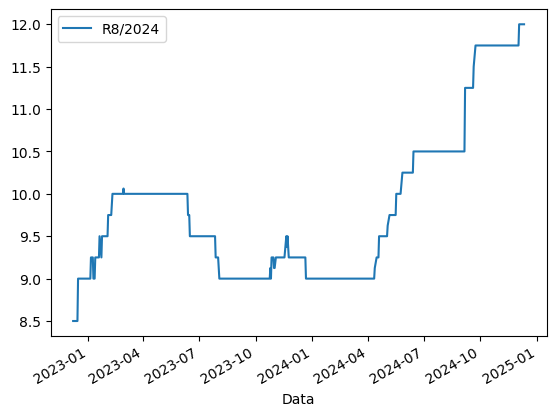

In [114]:
df_pivot=df.pivot_table(index='Data',columns='Reuniao',values='Mediana')
df_r8=df_pivot.filter(items={'R8/2024'}).dropna()
df_r8.plot()

In [85]:
df

,Data,Reuniao,Mediana
0,2024-12-20,R8/2026,11.75
1,2024-12-20,R7/2026,12.00
2,2024-12-20,R6/2026,12.25
3,2024-12-20,R5/2026,12.50
4,2024-12-20,R4/2026,13.00
...,...,...,...
18963,2020-01-02,R5/2020,4.25
18964,2020-01-02,R4/2020,4.25
18965,2020-01-02,R3/2020,4.25
18966,2020-01-02,R2/2020,4.25
